# 2. Model Evaluation Using Visualization

Model evaluation using visualization involves the use of various graphical representations to assess the performance and effectiveness of a machine learning model. Instead of relying solely on numerical metrics, visualizations offer a more intuitive and comprehensive understanding of the model's strengths and weaknesses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('automobileEDA.csv', header=0)

In [5]:
df.sample(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
146,1,87,toyota,std,two,hatchback,fwd,front,95.7,0.762614,...,9.0,62.0,4800.0,35,39,5348.0,6.714286,Low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
73,2,161,mitsubishi,std,two,hatchback,fwd,front,93.7,0.755887,...,9.4,68.0,5500.0,37,41,5389.0,6.351351,Low,0,1


In [4]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

**Regression Plot**

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48162.634159651214)

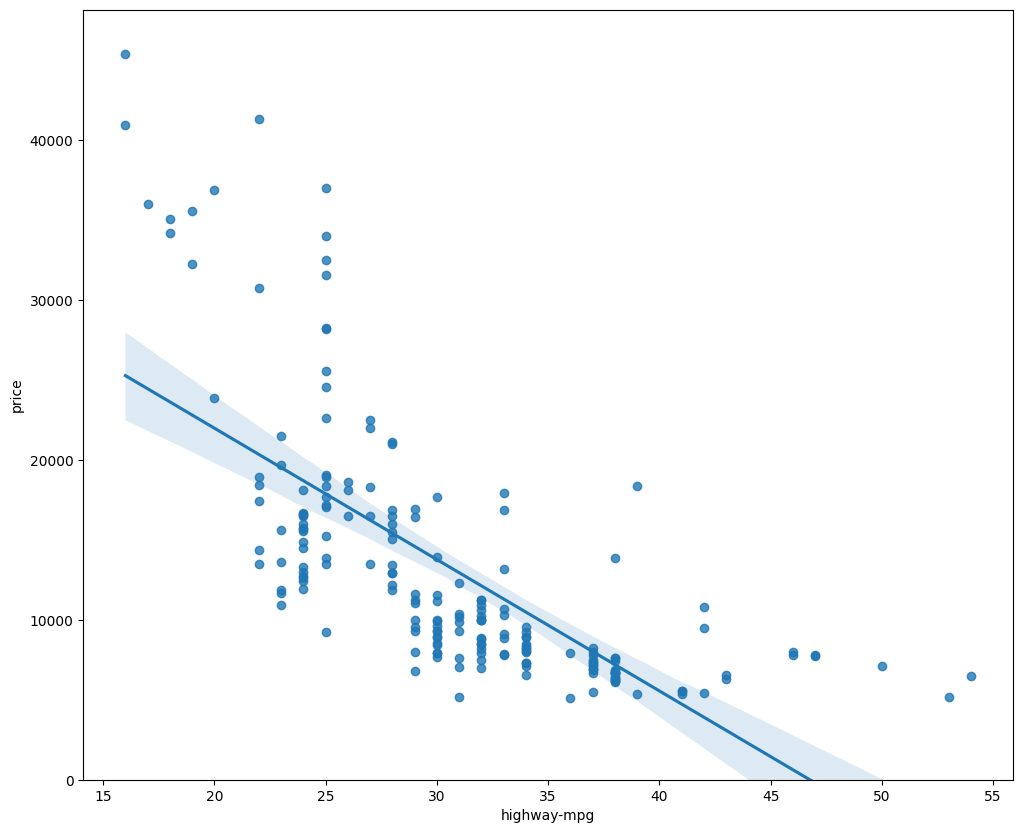

In [8]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

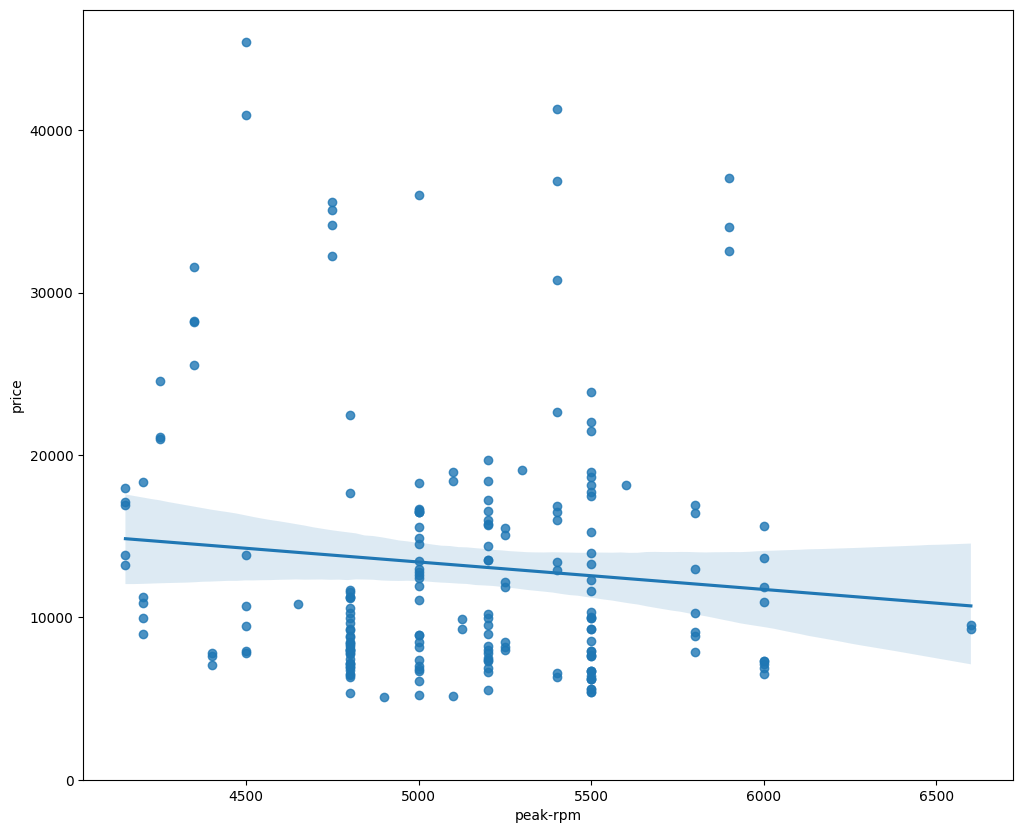

In [9]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.


In [10]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

#### Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

**What is a residual?**

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

**So what is a residual plot?**

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

**What do we pay attention to when looking at a residual plot?**

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

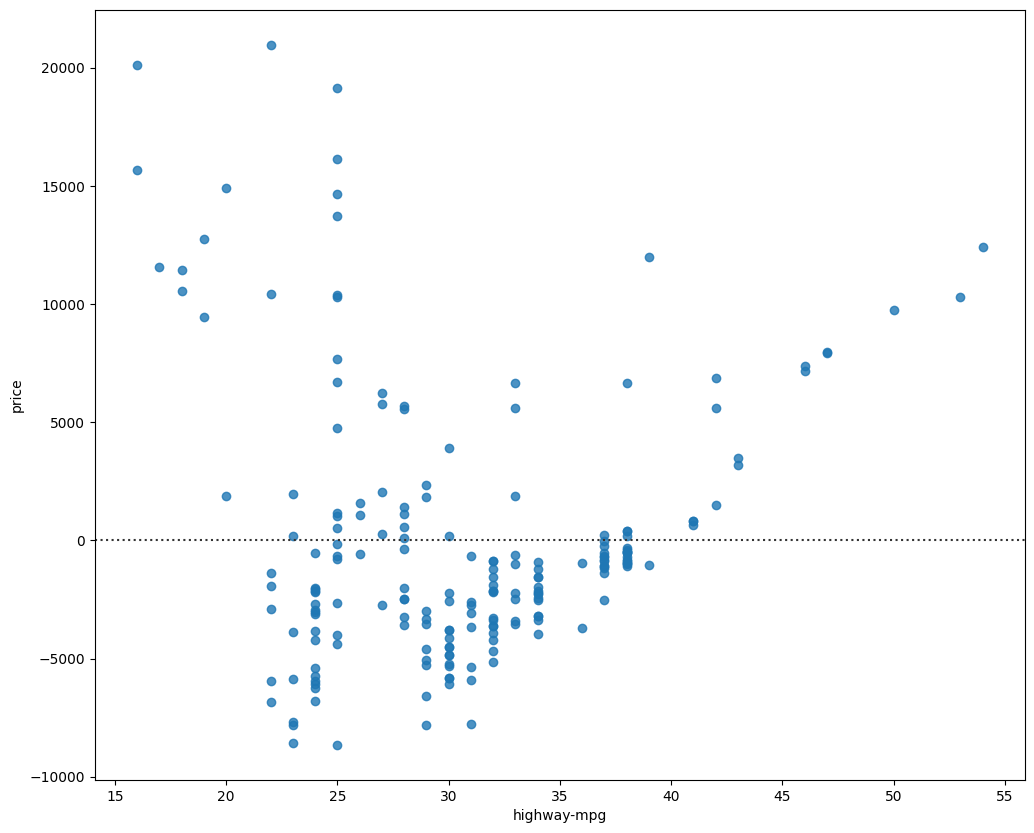

In [12]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm = LinearRegression()

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
Y_hat = lm.predict(Z)

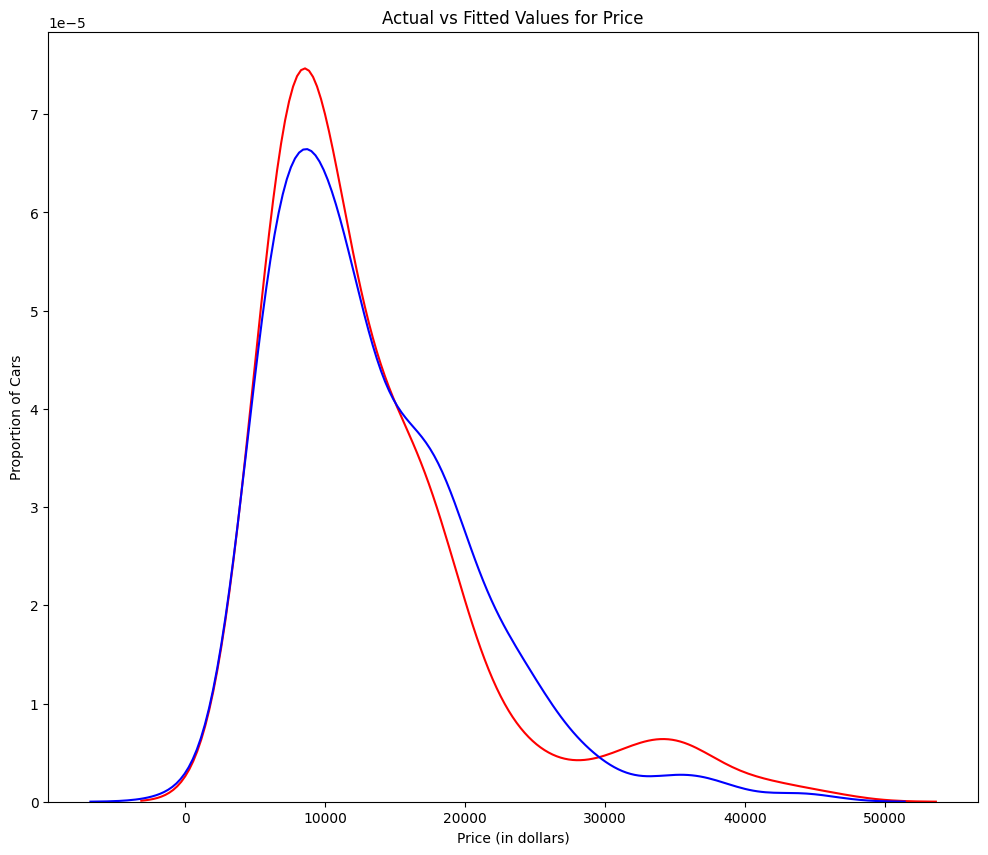

In [21]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.